In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [2]:
car_plate = cv2.imread('DATA/car_plate.jpg')

In [3]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(converted_img)

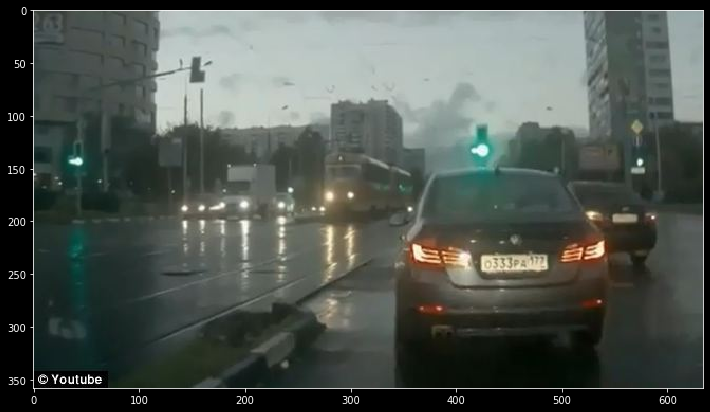

In [4]:
display(car_plate)

In [5]:
plate_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_russian_plate_number.xml')

Take the image and draw a rectangle around it

In [6]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rectangle = plate_cascade.detectMultiScale(plate_img, scaleFactor= 1.3, minNeighbors=3)
    for (x,y,w,h) in plate_rectangle:
        cv2.rectangle(plate_img, (x,y), (x+w, y+h), (0,0,255), 2)
        
    return plate_img

In [7]:
result = detect_plate(car_plate)

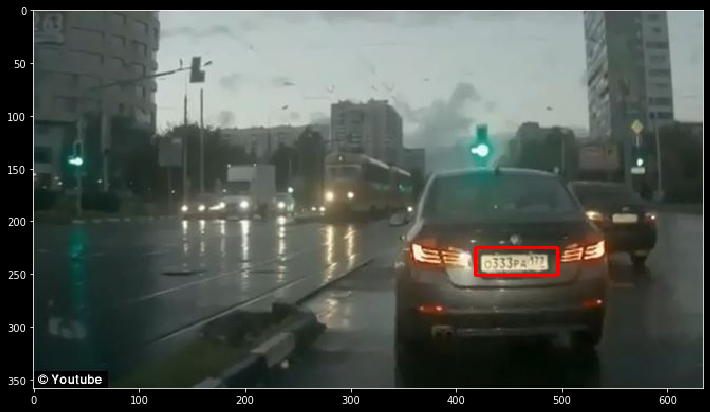

In [8]:
display(result)

In [11]:
def detect_and_blur_plate(img):
    '''takes the part of the image where license plate is detected via HaarCascade License Plate Detection, blurs that part of the image, and adds it back to the original image'''
    plate_img = img.copy()
    roi = img.copy()
    plate_rectangle = plate_cascade.detectMultiScale(plate_img, scaleFactor= 1.3, minNeighbors=3)
    for (x,y,w,h) in plate_rectangle:
        roi = roi[y : y + h , x : x + w]
        blurred_roi = cv2.medianBlur(roi, 7)
        plate_img[y : y + h , x: x + w] = blurred_roi
    return plate_img

In [13]:
result = detect_and_blur_plate(car_plate)

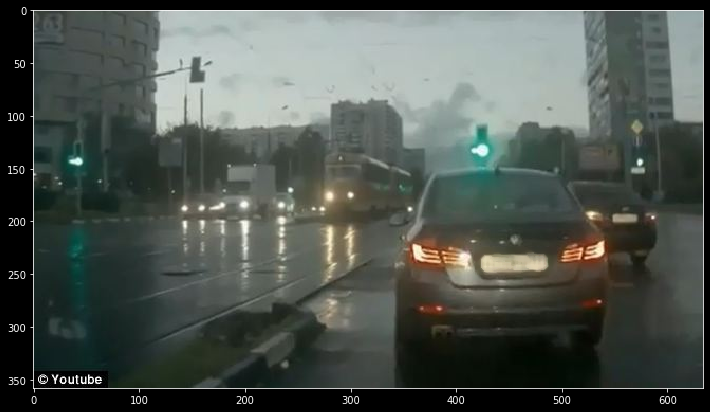

In [14]:
display(result)